    College Event Feedback Analysis
Data Science & Analytics – Task 3
Future Interns Internship Project

 Project Overview:

College events such as workshops and academic sessions collect student feedback, but this data is often underutilized.
This project analyzes student feedback data using data science techniques to understand satisfaction levels and identify areas for improvement.

 Dataset Description:

Source- Student feedback survey (CSV format)

Type: Rating-based feedback data

Each record represents feedback from one student across multiple parameters.

Load Dataset-

In [3]:
import pandas as pd
df = pd.read_csv("student_feedback.csv")



Data Cleaning & Preparation

Loaded the dataset using pandas

Checked for missing (null) values

Checked for duplicate records

No missing values or duplicates were found
Dataset was clean and ready for analysis.

In [4]:
df.isnull().sum()

SN                                                      0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

Identifier columns such as Serial Number and Student ID were excluded from the analysis, as they do not represent feedback ratings.


In [30]:
df[rating_columns].describe()


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Average Score for Each Parameter


In [27]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

avg_scores = df[rating_columns].mean().sort_values(ascending=False)
avg_scores


Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64

Exploratory Data Analysis (EDA)

🔹 Average Rating Analysis

Calculated average ratings for each feedback parameter

Identified strengths and weaker areas based on mean scores


In [8]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

avg_scores = df[rating_columns].mean()


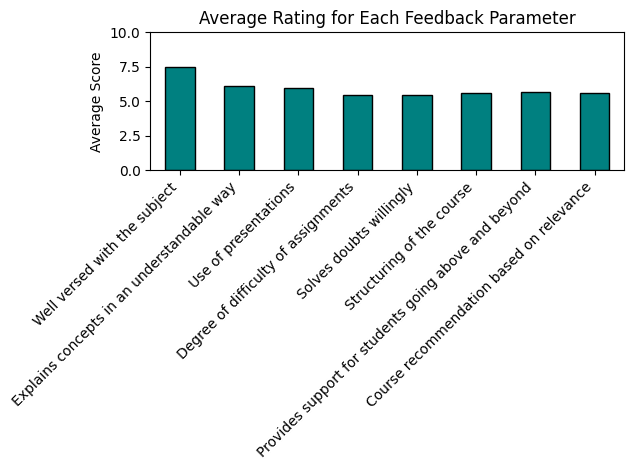

In [24]:
import matplotlib.pyplot as plt

avg_scores.plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)

plt.title("Average Rating for Each Feedback Parameter")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)   # IMPORTANT (rating scale)

plt.tight_layout()
plt.show()


Rating Distribution (Overall Effectiveness)

🔹Overall Effectiveness Analysis

Since no single overall column was present, an Overall Effectiveness score was calculated by averaging all rating parameters

Visualized distribution using a histogram

In [10]:
for col in df.columns:
    print(repr(col))


'SN'
'Student ID'
'Well versed with the subject'
'Explains concepts in an understandable way'
'Use of presentations'
'Degree of difficulty of assignments'
'Solves doubts willingly'
'Structuring of the course'
'Provides support for students going above and beyond'
'Course recommendation based on relevance'


In [11]:
df.columns = df.columns.str.strip()


In [12]:

rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

df['Overall Effectiveness'] = df[rating_columns].mean(axis=1)


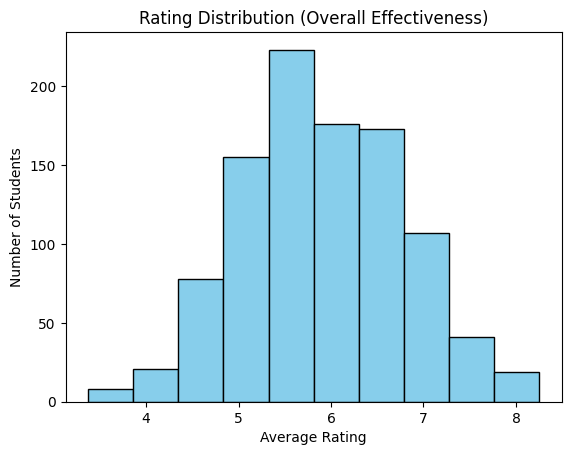

In [21]:
plt.hist(
    df['Overall Effectiveness'],
    bins=10,
    color='skyblue',
    edgecolor='black'
)
plt.title("Rating Distribution (Overall Effectiveness)")
plt.xlabel("Average Rating")
plt.ylabel("Number of Students")
plt.show()



Correlation Analysis

In [14]:

df.corr(numeric_only=True)

,SN,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall Effectiveness
SN,1.000000,-0.047897,-0.034524,-0.014716,0.018684,0.028489,0.020122,-0.032899,0.029320,-0.035824,-0.006333
Student ID,-0.047897,1.000000,0.028456,0.014302,0.003344,0.010314,0.008570,-0.048439,0.041793,-0.000564,0.017051
Well versed with the subject,-0.034524,0.028456,1.000000,0.008916,-0.024674,-0.007087,-0.056981,-0.027490,0.031488,-0.015143,0.204551
Explains concepts in an understandable way,-0.014716,0.014302,0.008916,1.000000,-0.012305,0.029484,-0.025839,0.012766,-0.003237,0.008528,0.371296
Use of presentations,0.018684,0.003344,-0.024674,-0.012305,1.000000,0.020918,-0.036972,-0.020097,-0.014798,0.023173,0.176207
Degree of difficulty of assignments,0.028489,0.010314,-0.007087,0.029484,0.020918,1.000000,0.009637,-0.053624,-0.002949,-0.005181,0.392695
Solves doubts willingly,0.020122,0.008570,-0.056981,-0.025839,-0.036972,0.009637,1.000000,0.036062,0.006543,-0.000511,0.392453
Structuring of the course,-0.032899,-0.048439,-0.027490,0.012766,-0.020097,-0.053624,0.036062,1.000000,-0.027819,-0.010224,0.379754
Provides support for students going above and beyond,0.029320,0.041793,0.031488,-0.003237,-0.014798,-0.002949,0.006543,-0.027819,1.000000,-0.031117,0.384881
Course recommendation based on relevance,-0.035824,-0.000564,-0.015143,0.008528,0.023173,-0.005181,-0.000511,-0.010224,-0.031117,1.000000,0.388351


Sentiment Analysis

In [15]:
def generate_feedback(score):
    if score >= 7:
        return "The event was very good and highly informative"
    elif score >= 5:
        return "The event was good but can be improved"
    else:
        return "The event was not satisfactory and needs improvement"

df['Feedback'] = df['Overall Effectiveness'].apply(generate_feedback)
df[['Overall Effectiveness', 'Feedback']].head()


,Overall Effectiveness,Feedback
0,5.000,The event was good but can be improved
1,4.875,The event was not satisfactory and needs impro...
2,4.375,The event was not satisfactory and needs impro...
3,5.875,The event was good but can be improved
4,7.500,The event was very good and highly informative


Sentiment Analysis(TextBlob)

The dataset contained only numerical ratings

Textual feedback was derived from overall effectiveness scores to simulate student comments

Sentiment analysis was performed using TextBlob

Feedback was classified into:

-Positive

-Neutral

-Negative 

In [16]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Feedback'].apply(get_sentiment)
df[['Feedback', 'Sentiment']].head()


,Feedback,Sentiment
0,The event was good but can be improved,Positive
1,The event was not satisfactory and needs impro...,Neutral
2,The event was not satisfactory and needs impro...,Neutral
3,The event was good but can be improved,Positive
4,The event was very good and highly informative,Positive


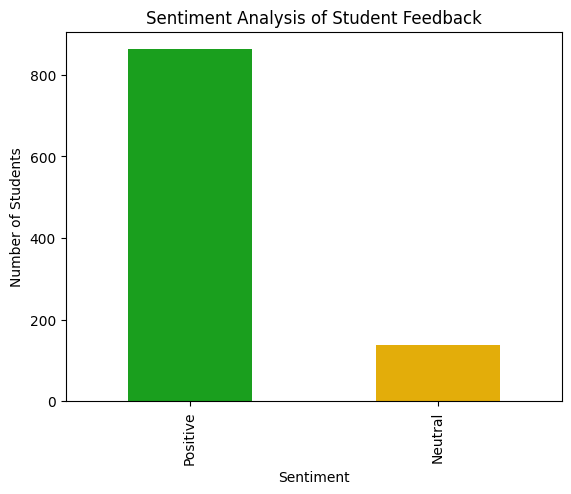

In [26]:
df['Sentiment'].value_counts().plot(
    kind='bar',
    color=["#1A9F1EFF", "#E3AD0A", '#F44336']
)
plt.title("Sentiment Analysis of Student Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Students")
plt.show()


 Key Insights--

Majority of feedback shows positive sentiment

Overall ratings indicate good student satisfaction

Neutral feedback highlights areas for improvement

No strong negative sentiment observed

 Recommendations--

Improve student engagement and interaction

Add more practical and interactive sessions

Focus on parameters with relatively lower average ratings

Continue practices that received positive feedback

 Tools & Technologies Used-

Python

pandas

matplotlib

TextBlob

CSV (Excel data)

 Conclusion-

This project demonstrates how student feedback data can be cleaned, analyzed, and visualized using Python. The insights derived from rating analysis and sentiment analysis can help organizers improve the quality of future college events.